# Titanic Data Visualization using seaborn/matplotlib
We can visualize the data accordingly to observe trends.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

Font and graph settings

In [3]:
sns.set(style='white')
sns.color_palette("deep")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lato-Regular']

In [4]:
train_data = pd.read_csv('train.csv')

We clean the data accordingly: remove features that are bad predictors and fill in missing values.

In [5]:
train_data.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

features = ['Pclass', 'Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare']
for fname in features:
    if train_data[fname].isna().any():
        #For numerics, fill in with mean. Else just use the most frequent value
        if train_data[fname].dtype == 'int64' or train_data[fname].dtype == 'float64':
            train_data[fname].fillna(train_data[fname].mean(), inplace=True)
        elif train_data[fname].dtype == 'object':
            train_data[fname].fillna(train_data[fname].mode()[0], inplace=True)

## Plotting total survival rate where 0 is "Did not survive" and 1 is "Survived"

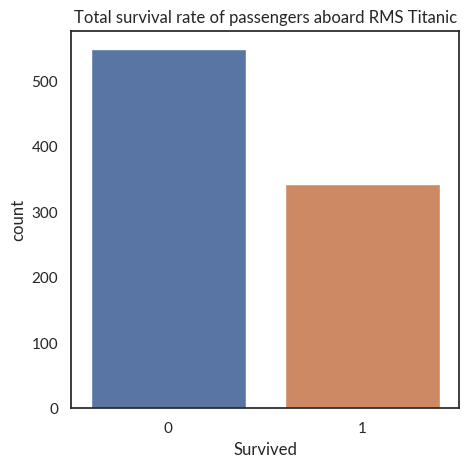

In [6]:
plt.figure(figsize=(5, 5), dpi=100)
plt.title("Total survival rate of passengers aboard RMS Titanic")
sns.countplot('Survived', data=train_data)
plt.show()

More people died than survived.

## Plotting survival rate based on gender

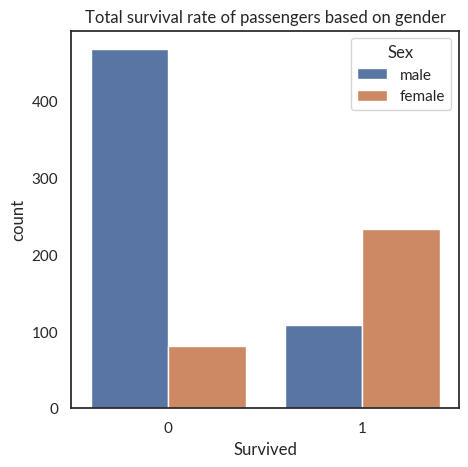

In [7]:
plt.figure(figsize=(5, 5), dpi=100)
plt.title("Total survival rate of passengers based on gender")
sns.countplot('Survived', data=train_data, hue='Sex')

More women survived than did men. This is indicative of the preference that women and children had when evacuating.

## Plotting age distribution of those survived against the age distribution of those that didn't

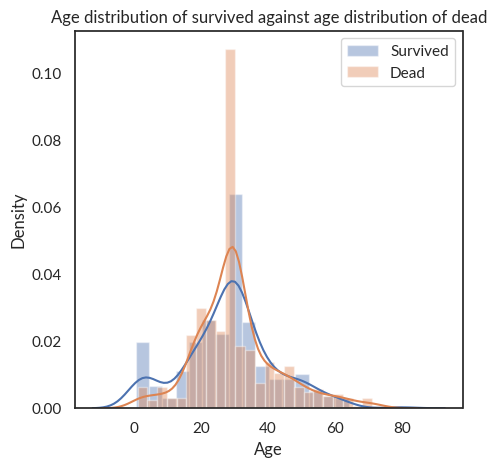

In [8]:
survived = []
not_survived = []
for index, row in train_data.iterrows():
    if row['Survived'] == 1:
        survived.append(row['Age'])
    elif row['Survived'] == 0:
        not_survived.append(row['Age'])
plt.figure(figsize=(5, 5), dpi=100)
plt.title("Age distribution of survived against age distribution of dead")
plt.xlabel("Age")
plt.ylabel("Density")
sns.distplot(survived, label='Survived', kde=True)
sns.distplot(not_survived, label='Dead', kde=True)
plt.legend()

Most of the people that survived and died were about 30 years old. There is a clear increase in survival at the 0-4 age range, which points to very young children being put on lifeboats first.  

## Plotting survival rate based on seating class

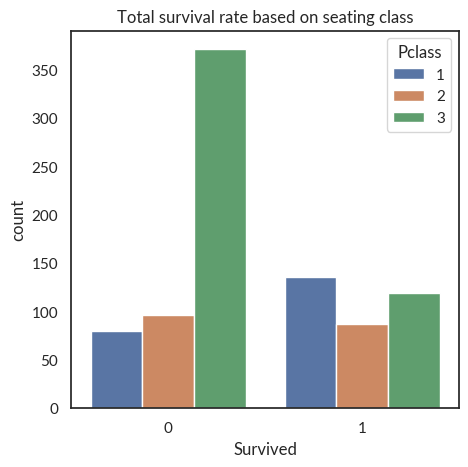

In [9]:
plt.figure(figsize=(5, 5), dpi=100)
plt.title("Total survival rate based on seating class")
sns.countplot('Survived', data=train_data, hue='Pclass')

This plot reveals that most of the casulaties came from those who occupied 3rd class. 3rd class was the least luxurious on Titanic; people in them received less of a priority when evacuating than the first class members. A similar trend is found in the plot below.

## Plotting fare prices against survival rate

(-0.1, 1.1)

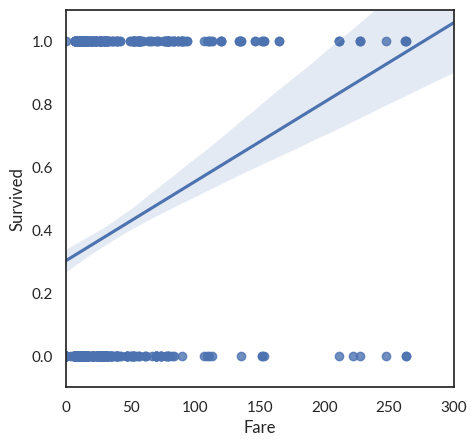

In [10]:
plt.figure(figsize=(5, 5), dpi=100)
sns.regplot(x='Fare', y='Survived', data=train_data)
plt.xlim(0, 300)
plt.ylim(-0.1, 1.1)

There is a strong positive correlation between survival rate and fare. That is, the more money a passenger spent on his/her ticket, and in turn, had higher class seating, the more likely they were to survive.

## Plotting survival rate against Siblings/Spouses and against Parents/Children

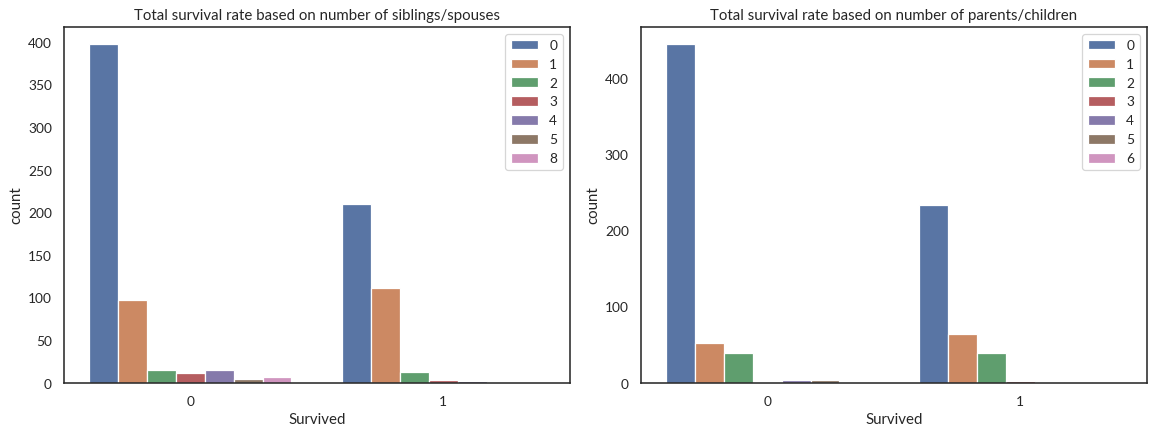

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=90)
ax1.set_title("Total survival rate based on number of siblings/spouses")
sns.countplot('Survived', data=train_data, hue='SibSp', ax=ax1)
ax2.set_title("Total survival rate based on number of parents/children")
sns.countplot('Survived', data=train_data, hue='Parch', ax=ax2)
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.tight_layout()

There was generally a higher chance of survival if one had significant relatives such as siblings, spouses or other family members on board. Interestingly, this correlation is slightly different when performing regression.

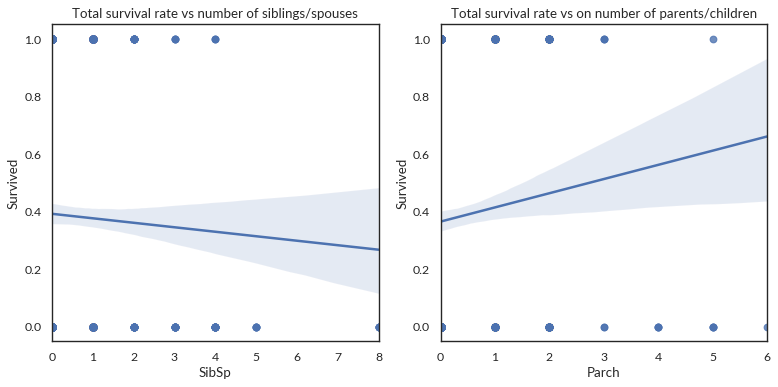

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=80)
ax1.set_title("Total survival rate vs number of siblings/spouses")
sns.regplot(x='SibSp', y='Survived', data=train_data, ax=ax1)
ax2.set_title("Total survival rate vs on number of parents/children")
sns.regplot(x='Parch', y='Survived', data=train_data, ax=ax2)
plt.tight_layout()

There is a slight negative correlation between the survival rate and total number of siblings/spouses. That is, the more siblings/spouses one has, the lower chance they have to survive. Although the bar charts above demonstrate that most people who did not survive did not have siblings or spouses, there is a non-trivial amount of non-survivors that had 3 or more siblings or spouses, which lends itself to the slight negative correlation in the regression plot.

## Plotting survival rate against port of departure. 

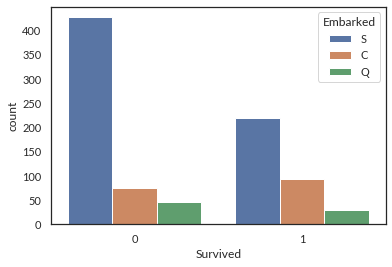

In [17]:
sns.countplot('Survived', hue=train_data['Embarked'], data=train_data)

The survival rate for port C in particular tends to be higher than the others, that is, from port C, more people survived than died.